# P03-03: Random Graph Models

*May 07 2020*

Pathpy provides build-generators for random graph models. We study the degree distribution of the generated networks and compare them to those of empirical networks.

In [1]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

A number of random graph models (among them $G(n,m)$ and $G(n,p)$) are implemented in the `pathpy` module `generators`. To generate random graphs using the $G(n,m)$ model we can write:

## The $G(n,m)$ model by Pál Erdös and Alred Rényi

In [2]:
pp.generators.ER_nm(30, 40, directed=False)

Note that we can also generate networks directed or undirected with or without loops and with multiple edges. If you want to quickly check the maximum number of possible edges for such networks with a given number of nodes, you can use the `max_edges` functions. It computes the quantities explained in the combinatorics primer in theory lecture L03: 

In [3]:
print(pp.generators.max_edges(100, directed=True, loops=True))
print(pp.generators.max_edges(100, directed=True, loops=False))
print(pp.generators.max_edges(100, directed=False, loops=True))
print(pp.generators.max_edges(100, directed=False, loops=False))

10000
9900
5050
4950


If we specify parameters of an impossible network, the function issues the appropriate error message:

In [4]:
pp.generators.ER_nm(n=100, m=5060, directed=False, loops=True)

[09-03 16:05:23: ERROR] Given network type with n nodes can have at most 5050 edges.


## The $G(n,p)$ model by Edgar Nelson Gilbert

A downside of the $G(n,m)$ model is that links are not generated independely. We can address this with another model originally proposed by Edgar Nelson Gilbert. It assumes that we initially generate n isolated nodes, then connecting each pair of nodes with a fixed probability p (i.e. through a Bernoulli trial):

Finally, we can use the function `pp.generators.ER_np` to generate networks according to the $G(n,p)$ model:

In [5]:
pp.generators.ER_np(n=100, p=0.02)

We often use random graph models to randomize the topolpgy of a given network, while keeping their aggregate characteristics. For this common task, `pathpy` provides `_randomize` versions of random graph functions that automatically adjust the model parameters to a given network instance. To see how this works, consider the following example network:

In [6]:
n_undirected = pp.Network(directed=False)
n_undirected.add_edge('a', 'b')
n_undirected.add_edge('b', 'c')
n_undirected.add_edge('c', 'a')
n_undirected.add_edge('d', 'e')
n_undirected.add_edge('e', 'f')
n_undirected.add_edge('f', 'g')
n_undirected.add_edge('g', 'd')
n_undirected.add_edge('d', 'f')
n_undirected.add_edge('b', 'd')
n_undirected.plot()

We can use the $G(n,m)$ model to generate a random version of this network with the same number of nodes, edges, the same edge directedness and the same node uids as follows:

In [7]:
pp.generators.ER_nm_randomize(n_undirected)

We can do the swme for the $G(n,p)$ model. Here the parameter $p$ is automatically fitted to the given network, i.e. it is chosen such that the number of *expected links* in the generated microstates matches the number of links in the given network:

In [8]:
pp.generators.ER_np_randomize(n_undirected)

We can study the degree distribution of the generated networks and compare them to those of empirical networks.

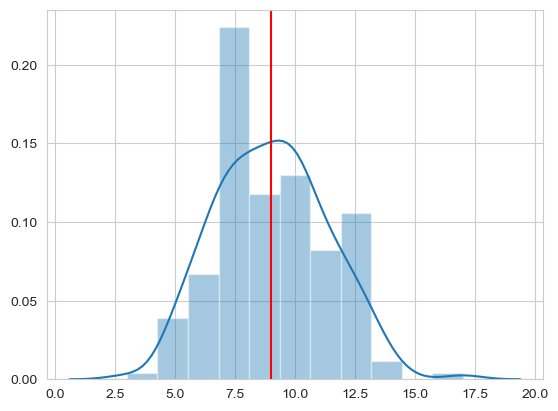

In [9]:
link_numbers = []
for i in range(200):
    r = pp.generators.ER_np_randomize(n_undirected)
    link_numbers.append(r.number_of_edges())
ax = sns.distplot(link_numbers)

ax.axvline(n_undirected.number_of_edges(), color='red')

### ADD MORE

## Empirical vs. random networks

Let us now study the degree distribution of random graphs, comparing them to the degree distributions of empirical networks. For this, we first load the three empirical networks that we used in the previous units:

In [10]:
n_gentoo = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM gentoo', directed=False)
n_highschool = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM highschool', directed=False)
n_physicians = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM physicians', directed=False)

For each network, we first plot the empirical degree distribution.

c:\users\vince\anaconda3\envs\devenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


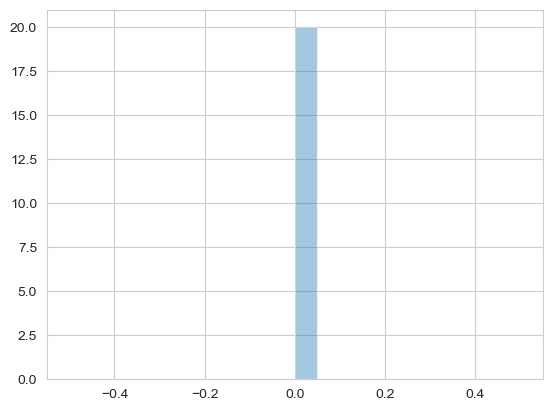

In [11]:
sns.distplot(n_gentoo.degree_sequence());

We then use the `ER_nm_randomize` function to generate a random microstate where the model parameters of the underlying $G(n,m)$ model have been adjusted to the number of nodes and links in the empirical network:

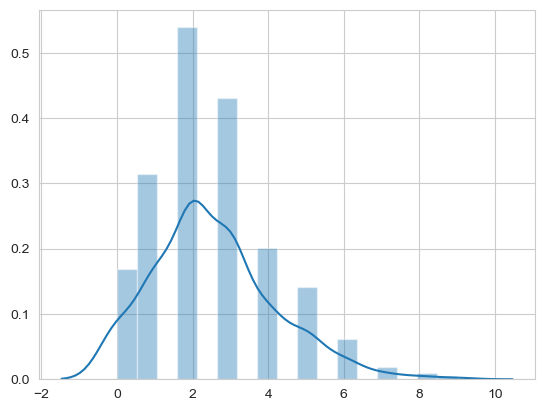

In [12]:
r_gentoo = pp.generators.random_graphs.ER_nm_randomize(n_gentoo)
sns.distplot(r_gentoo.degree_sequence());

Again, we find that the degree distribution of the random network is much more narrow than that of the empirical network. In other words: Compared to a simple random graph model this broad degree distribution actually constitutes an interesting pattern that we seek to model and explain. We repeat the same experiment with the highschool contact network:

c:\users\vince\anaconda3\envs\devenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


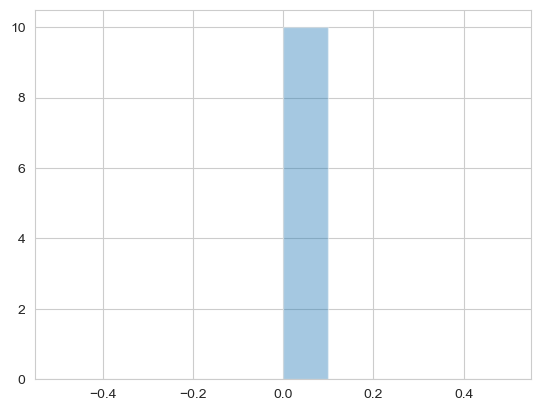

In [13]:
sns.distplot(n_highschool.degree_sequence());

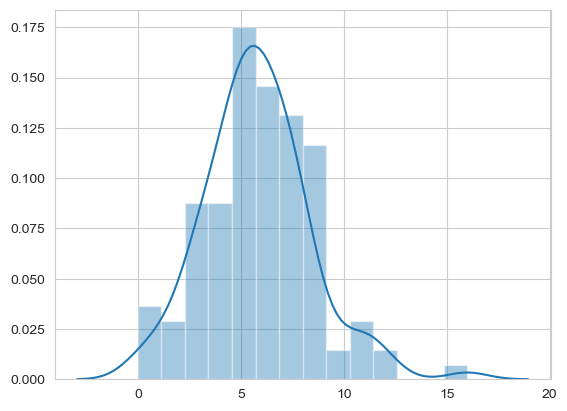

In [14]:
r_highschool = pp.generators.random_graphs.ER_nm_randomize(n_highschool)
sns.distplot(r_highschool.degree_sequence());

Here the empirical degree distribution resembles the degree distribution of a random graph more closely. What about the physicians network?

c:\users\vince\anaconda3\envs\devenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


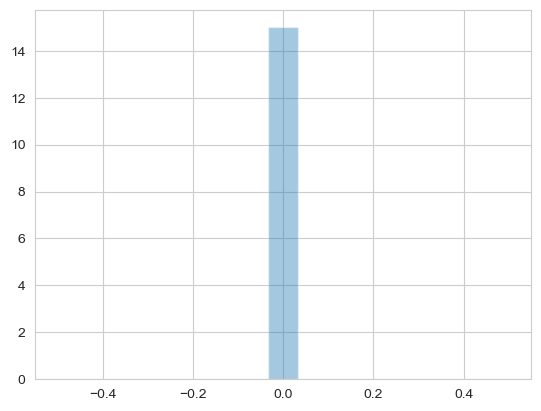

In [15]:
sns.distplot(n_physicians.degree_sequence());

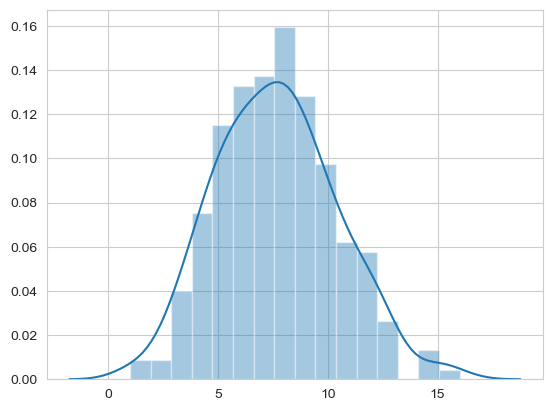

In [16]:
r_physicians = pp.generators.random_graphs.ER_nm_randomize(n_physicians)
sns.distplot(r_physicians.degree_sequence());

Again, the degree distribution of the random graph is close but not identical to the empirical degree distribution.

# Diameter and clustering coefficient of random vs. empirical networks

We conclude this week's practice lecture by looking at the diameter, average shortest path length, and clustering coefficient of empirical networks as well as their randomized counterparts. We start with the gentoo collaboration network:

In [17]:
print('Diameter = ', n_gentoo.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_gentoo))
print('Clustering coefficient = ', n_gentoo.avg_clustering_coefficient())

Diameter =  8.0
Avg path length =  3.1096379146451367
Clustering coefficient =  0.0


In [18]:
print('Diameter = ', r_gentoo.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_gentoo))
print('Clustering coefficient = ', r_gentoo.avg_clustering_coefficient())

Diameter =  inf
Avg path length =  inf
Clustering coefficient =  0.0037220843672456576


We find that (i) the clustering coefficient of the random realization is much smaller than in the empirical network, and (ii) the random realization is not connected, which leads to an infinite diameter and average shortest path length. To still allow for an approximate comparison, we can compute the largest connected component of the random realization and repeat the calculation:

In [19]:
r_gentoo_lcc = r_gentoo.largest_connected_component()

print('Diameter = ', r_gentoo_lcc.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_gentoo_lcc))
print('Clustering coefficient = ', r_gentoo_lcc.avg_clustering_coefficient())

Diameter =  15.0
Avg path length =  6.075301764159703
Clustering coefficient =  0.0041666666666666675


We find that both the diameter and the average shortest path length of the largest connected component of the random realization is much larger than that of the random realization. To further substantiate that diameter and shortest path lengths are indeed significantly smaller than expected at random, we need an analytical way to calculate this property, which we will address next week. We conclude by repeating this analysis for the highschool and physicians network:

In [20]:
print('Diameter = ', n_highschool.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_highschool))
print('Clustering coefficient = ', n_highschool.avg_clustering_coefficient())

Diameter =  12.0
Avg path length =  5.362745098039215
Clustering coefficient =  0.0


In [21]:
r_highschool_lcc = r_highschool.largest_connected_component()

print('Diameter = ', r_highschool_lcc.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_highschool_lcc))
print('Clustering coefficient = ', r_highschool_lcc.avg_clustering_coefficient())

Diameter =  6.0
Avg path length =  2.870491090830074
Clustering coefficient =  0.05533146232298775


Interestingly, the diameter and average path lengths of the random realization are smaller than that of the empirical network, i.e. we find the opposite case compared to the gentoo network. The clustering coefficient of a random network is much smaller.

In [22]:
print('Diameter = ', n_physicians.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_physicians))
print('Clustering coefficient = ', n_physicians.avg_clustering_coefficient())

Diameter =  inf
Avg path length =  inf
Clustering coefficient =  0.0


For the physicians network we find that the empirical network is not connected, i.e. the calculation of the diameter and the average shortest path length does not make sense here.

To further substantiate tthe finding that, e.g. for the highschool network the clustering coefficient is significantly larger than what we would expect at random, we can generate a distribution of clustering coefficients by calculating it in a number of microstates. We can then check who the observed clustering coefficient compares to that distribution:

In [25]:
from tqdm import tqdm

ccs = []
n = n_highschool.number_of_nodes()
m = n_highschool.number_of_edges()
for i in tqdm(range(20), desc='generating random graphs'):
    r = pp.generators.ER_nm(n, m)
    ccs.append(r.avg_clustering_coefficient())

generating random graphs: 100%|████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.58s/it]


NameError: name 'scipy' is not defined

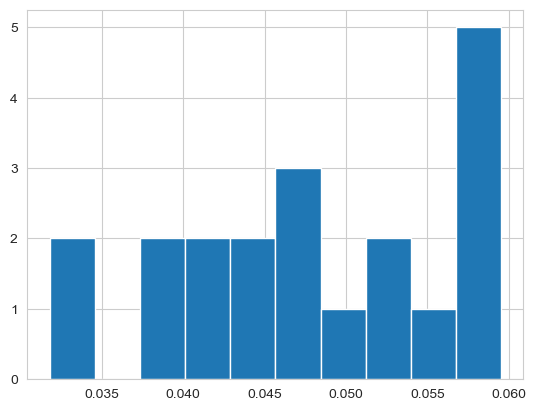

In [26]:
mean = np.mean(ccs)
std = np.std(ccs)
plt.hist(ccs)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std))
plt.axvline(x=n_highschool.avg_clustering_coefficient(), c='r')
plt.show()
print('Average clustering coefficient =', mean)
print('Std of clustering coefficient =', std)

The red vertical bar is the observed clustering coefficient and the curve on the left is a Gaussian fit to the distribution of coefficients of random realizations. This can be seen as a simple form of hypothesis testing, which can give us confidence that the large clustering coefficient is indeed a pattern in this network.

## Configuration Model

In pathpy we can test whether a sequence is graphic (i.e. whether a graph exists that has the sequence as degree sequence) with the `is_graphic_Erdos_Gallai` function in the `generators`module:

In [31]:
graphic_sequence = [1,2,2,3]
pp.generators.is_graphic_Erdos_Gallai(graphic_sequence)

True

In [30]:
non_graphic_sequence = [2,2,2,3]
pp.generators.is_graphic_Erdos_Gallai(non_graphic_sequence)

False

Graphic sequences are relevant since with them we can implement the Molloy-Reed/Configuration model, which generates random networks with an arbitrary degree distribution. This model is implemented by the following function:

In [33]:
pp.generators.Molloy_Reed(graphic_sequence)

We should note that the function above provides no guarantee to actually find a microstate with a given degree sequence, even if this sequence is graphic. It can actually run into situations where the only stubs left in the list `stubs` belong to nodes that are already connected or the same, i.e. they can never be removed if we do not allow self-loops and/or multi-edges. In the `pathpy` implementation, we fix this issue by additionally destroying a random existing edge whenever we sample a pair of nodes that would either lead to a self-loop or a multi-edge. This will allow us to break situations in which the simple implementation above runs into an infite loop. Nevertheless, you will find that even with this simple method the network generation will succeed quickly for a number of degree sequences, which highlights the large space of possible network realizations consistent with a given degree sequence.

In the following, we use this function to generate a k-regular random network with $100$ nodes and $k = 2$, i.e. a network in which all nodes have a degree of exactly two.

In [35]:
n = pp.generators.Molloy_Reed([2]*50)
n.plot()

we can also generate networks with a fixed degree distribution rather than a fixed degree sequence. For this we first draw degree sequences from a given distribution, check whether the sequence is graphic and then apply the model above. Below, we apply this to a sequence of 300 degrees drawn from a *Zipf* distribution with parameter $\gamma=2.7$, and a *Poisson* distribution with $\lambda=3$. We then generate two random networks with the drawn degree sequences, plot the networks as well as their degree distributions. To draw the degree sequences we can use the implementations of distributions in `np.random.zipf` and `np.random.poisson`.

In [37]:
degrees_zipf = [1]
while not pp.generators.is_graphic_Erdos_Gallai(degrees_zipf):
    degrees_zipf = [int(x) for x in np.random.zipf(2.5, 300)]

g_zipf = pp.generators.Molloy_Reed(degrees_zipf)
g_zipf.plot()

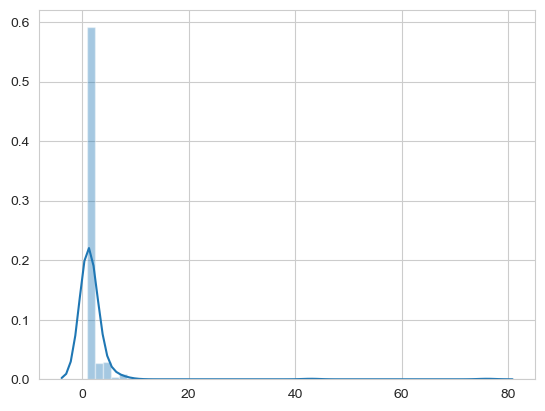

In [38]:
sns.distplot(pp.statistics.degree_sequence(g_zipf));

# Molloy-Reed model as null model for empirical networks

An important application of the Molloy-Reed model in statistical network analysis is as a null model that helps us to establish a baseline for what we can expect at random, if we account for the heterogeneous degrees in a real network. To show the advantage over simple rrandom graph models that only preserve the size of the network, we make an experiment with real data. We compare the diameter and average shortest path length of the largest connected component in empirical networks with those of random microstates generated using the $G(n,p)$ and the Molloy-Reed model. 

To simplify the generation of random microstates that preserve the macrostate of an empirical network, the functions in the module `pathpy.generators` come in a `randomize` version, which automatically preserve the corresponding macrostate of a given network. In the case of the $G(n,p)$ model this automatically adjust the parameters $n$ and $p$ such that the expected number of links matches the observed number of links in the given network. For the molloy-Reed model, the degree sequence of the empirical network is used in the generation of a random microstate. All other network properties like, e.g. node uids are preserved. We demonstrate this in the following example:

In [41]:
n_lotr = pp.io.sql.read_network('networks.db', sql='SELECT DISTINCT source, target from lotr', directed=False)
# n_lotr

In [43]:
# pp.generators.ER_np_randomize(n_lotr)

In [44]:
# pp.generators.Molloy_Reed_randomize(n_lotr)

In [45]:
n_gentoo = pp.io.sql.read_network('networks.db', sql='SELECT DISTINCT source, target from gentoo', directed=False).largest_connected_component()

n_highschool = pp.io.sql.read_network('networks.db', sql='SELECT DISTINCT source, target from highschool', directed=False).largest_connected_component()

In [46]:
print("Empirical network has", n_gentoo.number_of_nodes(), "nodes and", n_gentoo.number_of_edges(), "edges")
print("Empirical network has diameter =", pp.algorithms.shortest_paths.diameter(n_gentoo))
print("Empirical network has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(n_gentoo))

Empirical network has 1 nodes and 513 edges


KeyError: 'seemant'

In [24]:
r_gentoo = pp.generators.random_graphs.ER_np_randomize(n_gentoo).largest_connected_component()
print("G(n,p) microstate has", r_gentoo.number_of_nodes(), "nodes and", r_gentoo.number_of_edges(), "edges")
print("G(n,p) microstate has diameter =", pp.algorithms.shortest_paths.diameter(r_gentoo))
print("G(n,p) microstate has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(r_gentoo))

G(n,p) microstate has 372 nodes and 543 edges
G(n,p) microstate has diameter = 13.0
G(n,p) microstate has avg. shortest path length = 5.949033417383996


In [25]:
r_gentoo = pp.generators.random_graphs.Molloy_Reed_randomize(n_gentoo).largest_connected_component()
print("Molloy-Reed microstate has", r_gentoo.number_of_nodes(), "nodes and", r_gentoo.number_of_edges(), "edges")
print("Molloy-Reed microstate has diameter =", pp.algorithms.shortest_paths.diameter(r_gentoo))
print("Molloy-Reed microstate has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(r_gentoo))

Molloy-Reed microstate has 373 nodes and 498 edges
Molloy-Reed microstate has diameter = 8.0
Molloy-Reed microstate has avg. shortest path length = 2.76391651532186


In [26]:
print("Empirical network has", n_highschool.number_of_nodes(), "nodes and", n_highschool.number_of_edges(), "edges")
print("Empirical network has diameter =", pp.algorithms.shortest_paths.diameter(n_highschool))
print("Empirical network has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(n_highschool))

Empirical network has 120 nodes and 502 edges
Empirical network has diameter = 12.0
Empirical network has avg. shortest path length = 5.362745098039215


In [27]:
r_highschool = pp.generators.random_graphs.ER_np_randomize(n_highschool).largest_connected_component()
print("G(n,p) microstate has", r_highschool.number_of_nodes(), "nodes and", r_highschool.number_of_edges(), "edges")
print("G(n,p) microstate has diameter =", pp.algorithms.shortest_paths.diameter(r_highschool))
print("G(n,p) microstate has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(r_highschool))

G(n,p) microstate has 120 nodes and 498 edges
G(n,p) microstate has diameter = 4.0
G(n,p) microstate has avg. shortest path length = 2.4794117647058824


In [28]:
r_highschool = pp.generators.random_graphs.Molloy_Reed_randomize(r_highschool).largest_connected_component()
print("Molloy-Reed microstate has", r_highschool.number_of_nodes(), "nodes and", r_highschool.number_of_edges(), "edges")
print("Molloy-Reed microstate has diameter =", pp.algorithms.shortest_paths.diameter(r_highschool))
print("Molloy-Reed microstate has avg. shortest path length =", pp.algorithms.shortest_paths.avg_path_length(r_highschool))

Molloy-Reed microstate has 120 nodes and 498 edges
Molloy-Reed microstate has diameter = 4.0
Molloy-Reed microstate has avg. shortest path length = 2.4745098039215687
